In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [70]:
file_path = os.path.join("..", "files", "comparison_domains_ranks.csv")

In [71]:
df = pd.read_csv(file_path)
df.head()

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value,Personalized Pagerank Value
0,0.0,0.002114,0.002114,0.002091,0.002114
1,1.0,0.001876,0.001876,0.001874,0.001876
2,2.0,0.001810,0.001810,0.001814,0.001810
3,3.0,0.002153,0.002153,0.002159,0.002153
4,4.0,0.002260,0.002260,0.002262,0.002260


In [72]:
df.describe()

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value,Personalized Pagerank Value
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.002000,0.002000,0.002000,0.002000
std,144.481833,0.000141,0.000141,0.000141,0.000141
min,0.000000,0.001622,0.001622,0.001614,0.001622
25%,124.750000,0.001905,0.001905,0.001902,0.001905
50%,249.500000,0.001988,0.001988,0.001988,0.001988
75%,374.250000,0.002098,0.002098,0.002096,0.002098
max,499.000000,0.002449,0.002449,0.002438,0.002449


In [73]:
# # Remove empty lines
# df['Our Fast Pagerank Value'].replace('', np.nan, inplace=True)
# df.dropna(subset=['Our Fast Pagerank Value'], inplace=True)
# df.describe()

In [74]:
# normalize cols
pageranks_values_names = ['Our Fast Pagerank Value', 'Numpy Pagerank Value',
                     'Scipy Pagerank Value']

for name in pageranks_values_names:
    initial_sum = df[name].sum()
    print('Initial sum of cols of ', name, " -- ", initial_sum)

    if abs(1 - initial_sum) > 1e-6:
        df[name] = df[name] / df[name].sum()

df.describe()
df.head()


Initial sum of cols of  Our Fast Pagerank Value  --  0.999999999999975
Initial sum of cols of  Numpy Pagerank Value  --  0.9999999999999745
Initial sum of cols of  Scipy Pagerank Value  --  0.9999999999999751


,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value,Personalized Pagerank Value
0,0.0,0.002114,0.002114,0.002091,0.002114
1,1.0,0.001876,0.001876,0.001874,0.001876
2,2.0,0.001810,0.001810,0.001814,0.001810
3,3.0,0.002153,0.002153,0.002159,0.002153
4,4.0,0.002260,0.002260,0.002262,0.002260


In [75]:
# sum(df['Numpy Pagerank Value'])

<AxesSubplot:>

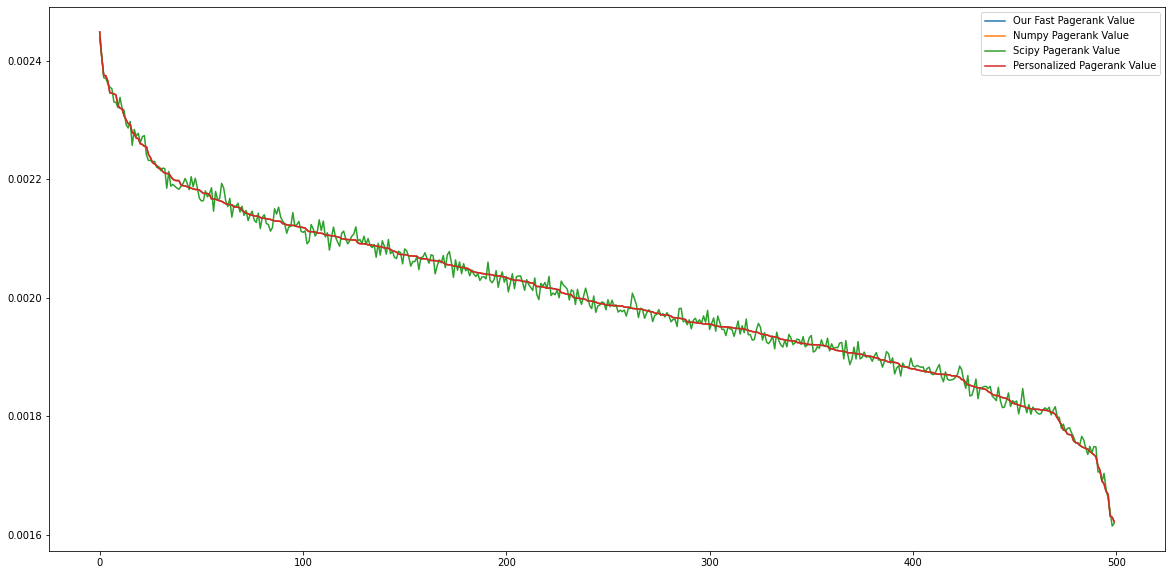

In [76]:
df = df.sort_values(by=pageranks_values_names[0], ascending = False)
df = df.reset_index(drop=True)

df.loc[:, df.columns != "Domain ID"].plot()

In [77]:
ranks_cols_names = ['Our Rank', 'Numpy Pagerank Rank',
                    'Scipy Pagerank Rank']
for i, name in enumerate(pageranks_values_names):
    df = df.sort_values(by=name, ascending = False)
    df = df.reset_index(drop=True)
    df[ranks_cols_names[i]] = df.index

# df = df.sort_values(by='Our Fast Pagerank Value', ascending = False)
# df = df.reset_index(drop=True)
# df['Open PR Rank'] = df.index

df

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value,Personalized Pagerank Value,Our Rank,Numpy Pagerank Rank,Scipy Pagerank Rank
0,46.0,0.002449,0.002449,0.002438,0.002449,0,0,0
1,255.0,0.002407,0.002407,0.002408,0.002407,1,1,1
2,445.0,0.002375,0.002375,0.002371,0.002375,2,2,2
3,237.0,0.002375,0.002375,0.002371,0.002375,3,3,3
4,121.0,0.002366,0.002366,0.002361,0.002366,4,4,4
...,...,...,...,...,...,...,...,...
495,12.0,0.001673,0.001673,0.001676,0.001673,495,495,495
496,181.0,0.001668,0.001668,0.001661,0.001668,496,496,496
497,476.0,0.001631,0.001631,0.001637,0.001631,497,497,497
498,413.0,0.001622,0.001622,0.001619,0.001622,499,499,498


Are all layers belong to one plot ? --  True


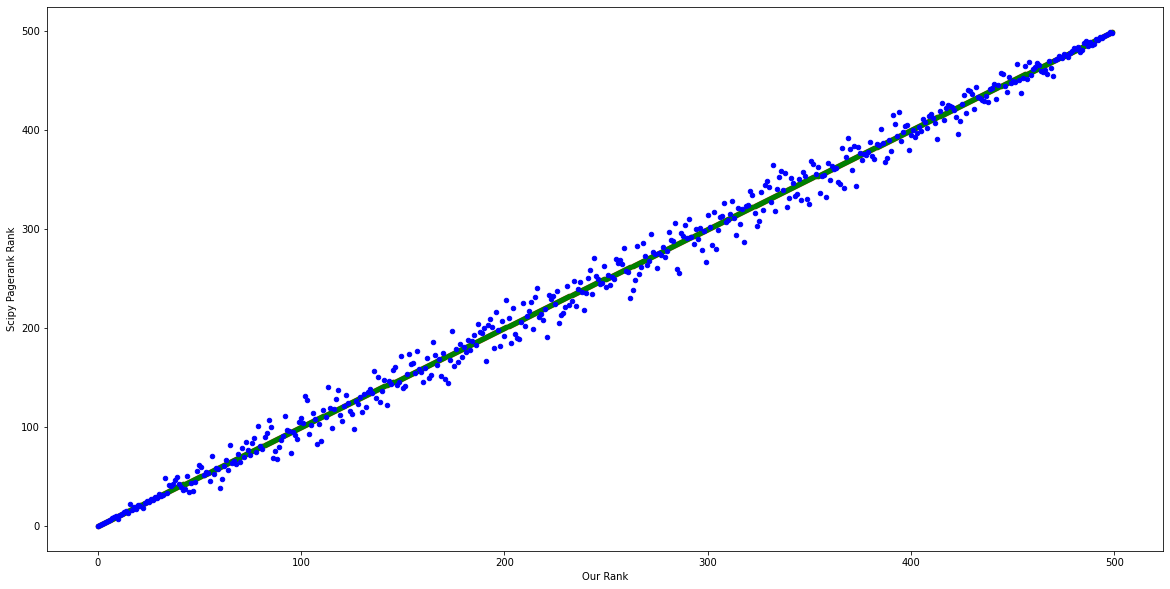

In [80]:
ax1 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[0], color='r')

colors = ['g', 'b', '#cd00ff']
# colors = cm.rainbow(np.linspace(0, 1, len(ranks_cols_names[1:])))

# for i, name in enumerate(ranks_cols_names[1:]):
#     df.plot.scatter(x=ranks_cols_names[0], y=name, color=colors[i], ax=ax1)

ax2 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[1], color=colors[0], ax=ax1)
ax3 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[2], color=colors[1], ax=ax1)

print("Are all layers belong to one plot ? -- ", ax1 == ax2 == ax3)

# ax1.legend()

In [79]:
# calculate Root Mean Square Error
for i in range(1, len(pageranks_values_names)):
    print(f"RMSR between {pageranks_values_names[0]} and {pageranks_values_names[i]}:",
        (( df[pageranks_values_names[0]] - df[pageranks_values_names[i]] ) ** 2).mean() ** .5)


RMSR between Our Fast Pagerank Value and Numpy Pagerank Value: 1.275102465588296e-12
RMSR between Our Fast Pagerank Value and Scipy Pagerank Value: 1.0265836161885292e-05
